In [18]:
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt

## Load image

In [19]:
file = 'page.jpg'

In [20]:
image = cv2.imread(file)
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)

In [21]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

## show the original image and the edge detected image

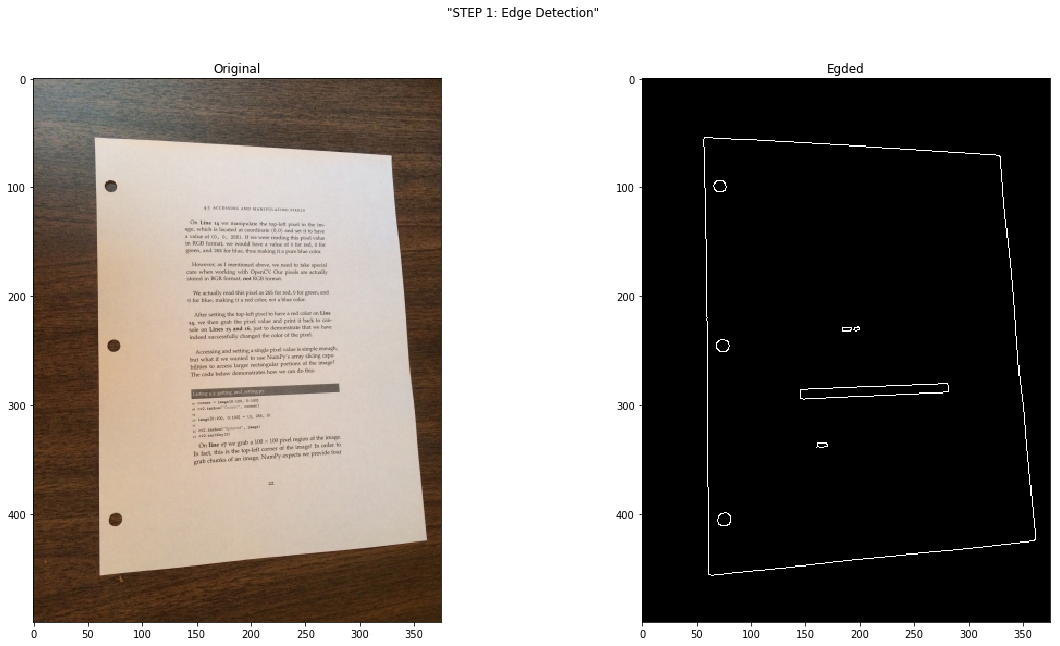

In [22]:
plt.figure(figsize=(20,10))
plt.suptitle('"STEP 1: Edge Detection"')
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.title('Egded')
plt.imshow(edged,cmap='gray')
plt.show()

## show the contour (outline) of the piece of paper

In [23]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

In [24]:
# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break

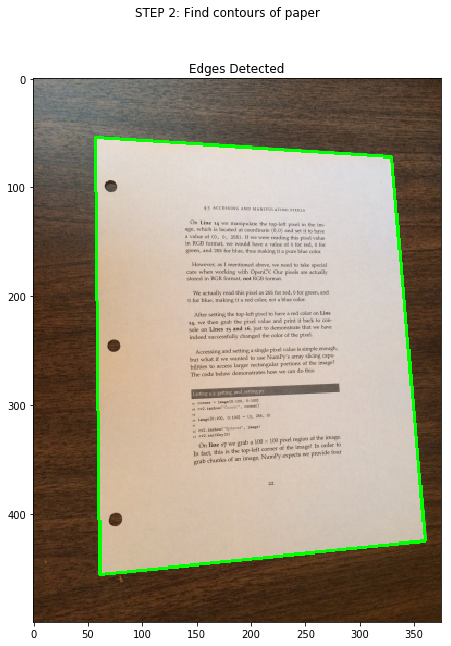

In [25]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

plt.figure(figsize=(10,10))
plt.suptitle("STEP 2: Find contours of paper")
plt.title('Edges Detected')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255

## show the original and scanned images

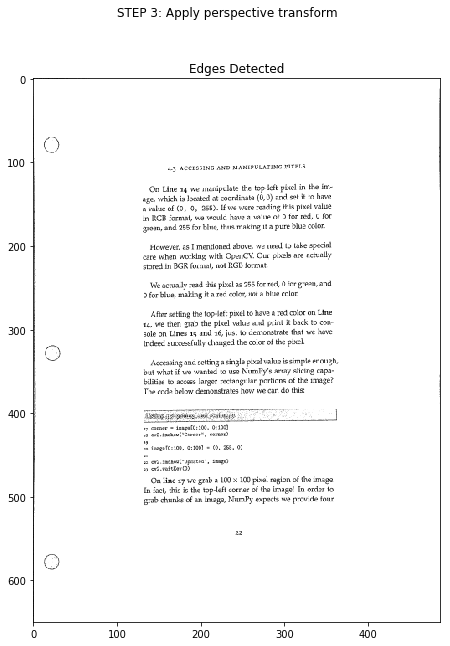

In [27]:
scaned = imutils.resize(warped, height = 650)

plt.figure(figsize=(10,10))
plt.suptitle("STEP 3: Apply perspective transform")
plt.title('Edges Detected')
plt.imshow(scaned, cmap='gray')
plt.show()